<a href="https://colab.research.google.com/github/Ghufrnainun/2025_ComputerVision_TI2C/blob/main/Jobsheet_2_Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum 01. Memulai Klasifikasi Gambar dengan Dataset Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


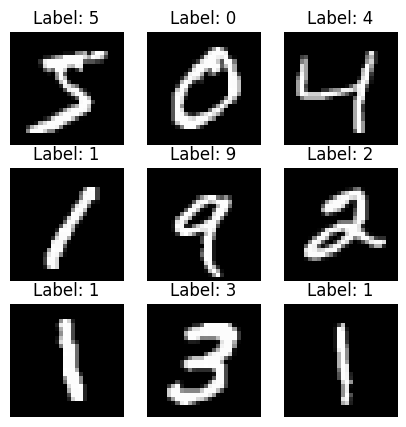

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(5,5))
for i in range (9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

Tugas Kecil

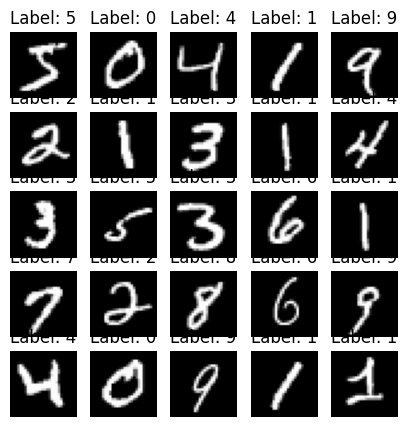

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(5,5))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

## Praktikum 02. Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [11]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) /255.0

#SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi :", accuracy_score(y_test,y_pred))

Akurasi : 0.9101


Tugas Kecil

In [12]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) /255.0

#SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi :", accuracy_score(y_test,y_pred))

Akurasi : 0.9513


## Praktikum 03. Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.8976 - loss: 0.3498 - val_accuracy: 0.9790 - val_loss: 0.0741
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - accuracy: 0.9805 - loss: 0.0656 - val_accuracy: 0.9850 - val_loss: 0.0557
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9876 - loss: 0.0423 - val_accuracy: 0.9853 - val_loss: 0.0543
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 0.9923 - loss: 0.0277 - val_accuracy: 0.9865 - val_loss: 0.0545
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.9937 - loss: 0.0196 - val_accuracy: 0.9880 - val_loss: 0.0484


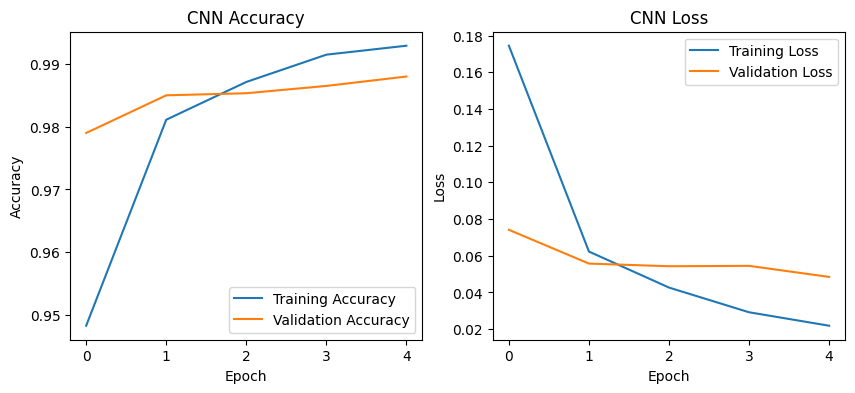

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
 layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
 layers.MaxPooling2D((2,2)),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Tugas Kecil

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.8862 - loss: 0.3799 - val_accuracy: 0.9795 - val_loss: 0.0690
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.9822 - loss: 0.0593 - val_accuracy: 0.9848 - val_loss: 0.0480
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9879 - loss: 0.0397 - val_accuracy: 0.9878 - val_loss: 0.0456
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9906 - loss: 0.0294 - val_accuracy: 0.9883 - val_loss: 0.0377
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9937 - loss: 0.0200 - val_accuracy: 0.9900 - val_loss: 0.0353


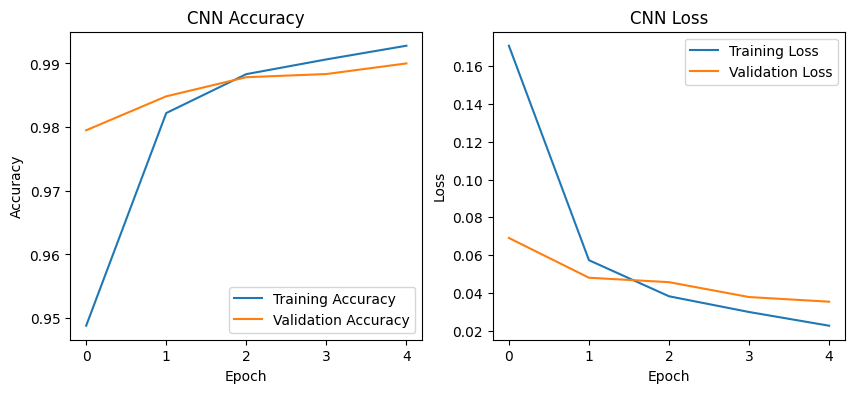

In [44]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
 layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
 layers.MaxPooling2D((2,2)),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Praktikum 04. Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 69s 48ms/step - accuracy: 0.3617 - loss: 1.7316 - val_accuracy: 0.5474 - val_loss: 1.2860
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 39ms/step - accuracy: 0.5798 - loss: 1.1858 - val_accuracy: 0.6218 - val_loss: 1.0798
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 41ms/step - accuracy: 0.6404 - loss: 1.0396 - val_accuracy: 0.6446 - val_loss: 1.0065
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - accuracy: 0.6681 - loss: 0.9523 - val_accuracy: 0.6710 - val_loss: 0.9529
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.6921 - loss: 0.8823 - val_accuracy: 0.6780 - val_loss: 0.9431
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.7119 - loss: 0.8243 - val_accuracy: 0.6940 - val_loss: 0.8886
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7249 - loss: 0.7851 - val_accuracy: 0.6904 - val_loss: 0.9219
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7463 -

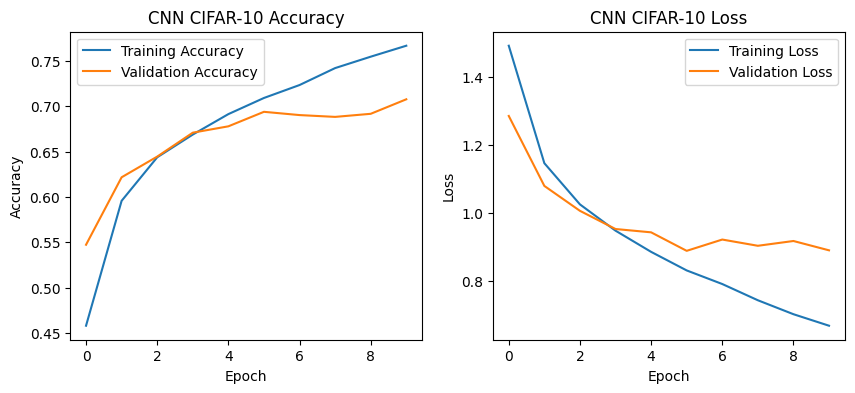

In [45]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test,y_test)  = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tugas Kecil

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 39ms/step - accuracy: 0.2807 - loss: 1.9286 - val_accuracy: 0.5338 - val_loss: 1.3369
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.4647 - loss: 1.4734 - val_accuracy: 0.5998 - val_loss: 1.1790
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.5182 - loss: 1.3362 - val_accuracy: 0.6132 - val_loss: 1.1278
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.5474 - loss: 1.2683 - val_accuracy: 0.6406 - val_loss: 1.0374
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.5690 - loss: 1.1953 - val_accuracy: 0.6530 - val_loss: 1.0075
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.5845 - loss: 1.1574 - val_accuracy: 0.6624 - val_loss: 0.9678
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.5973 - loss: 1.1228 - val_accuracy: 0.6488 - val_loss: 1.0232
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.6097 -

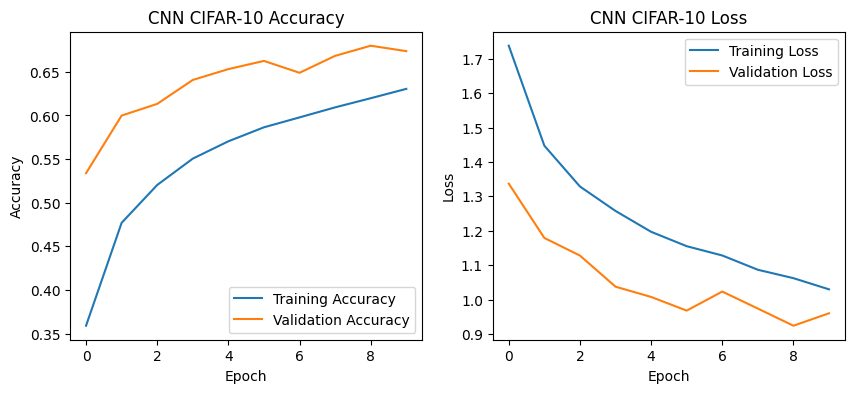

In [46]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test,y_test)  = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Praktikum 05. Transfer Learning dengan Model Pra-Latih

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 543s 385ms/step - accuracy: 0.4513 - loss: 1.5639 - val_accuracy: 0.5860 - val_loss: 1.2082
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 568s 404ms/step - accuracy: 0.5716 - loss: 1.2218 - val_accuracy: 0.5890 - val_loss: 1.1904
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 568s 404ms/step - accuracy: 0.6007 - loss: 1.1429 - val_accuracy: 0.5936 - val_loss: 1.1469
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 568s 404ms/step - accuracy: 0.6154 - loss: 1.1041 - val_accuracy: 0.6078 - val_loss: 1.1226
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 594s 384ms/step - accuracy: 0.6295 - loss: 1.0595 - val_accuracy: 0.6148 - val_loss: 1.1015


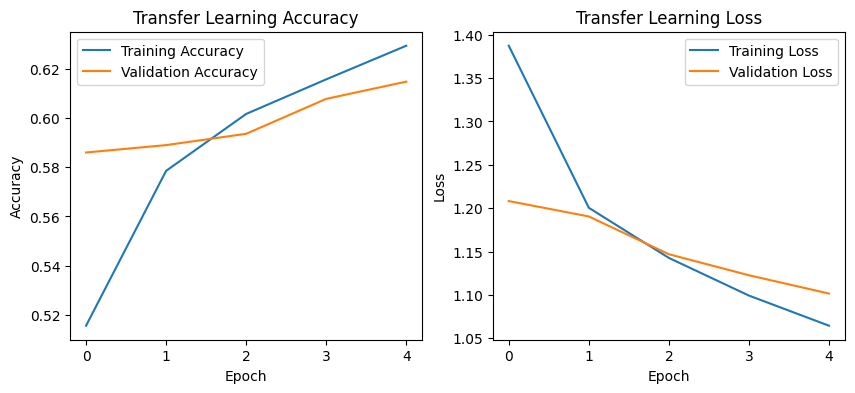

In [47]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential ([
    base_model, layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

tugas Kecil

In [48]:
# Unfreeze beberapa layer terakhir VGG16
base_model.trainable = True

# Cuma buka 2 layer terakhir aja (biar ga berat & ga overfit)
for layer in base_model.layers[:-2]:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # lr lebih kecil pas fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.1
)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 614s 435ms/step - accuracy: 0.3730 - loss: 1.8388 - val_accuracy: 0.5680 - val_loss: 1.2756
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 651s 456ms/step - accuracy: 0.5799 - loss: 1.2470 - val_accuracy: 0.6024 - val_loss: 1.1511
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 682s 457ms/step - accuracy: 0.6147 - loss: 1.1396 - val_accuracy: 0.6274 - val_loss: 1.0881
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 639s 454ms/step - accuracy: 0.6378 - loss: 1.0697 - val_accuracy: 0.6348 - val_loss: 1.0506
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 682s 454ms/step - accuracy: 0.6492 - loss: 1.0272 - val_accuracy: 0.6492 - val_loss: 1.0211


## Praktikum 06. Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 108s 343ms/step
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1000
           1       0.72      0.71      0.72      1000
           2       0.57      0.50      0.53      1000
           3       0.50      0.45      0.47      1000
           4       0.59      0.55      0.57      1000
           5       0.57      0.53      0.55      1000
           6       0.63      0.72      0.67      1000
           7       0.66      0.73      0.69      1000
           8       0.76      0.75      0.76      1000
           9       0.66      0.72      0.69      1000

    accuracy                           0.64     10000
   macro avg       0.63      0.64      0.63     10000
weighted avg       0.63      0.64      0.63     10000



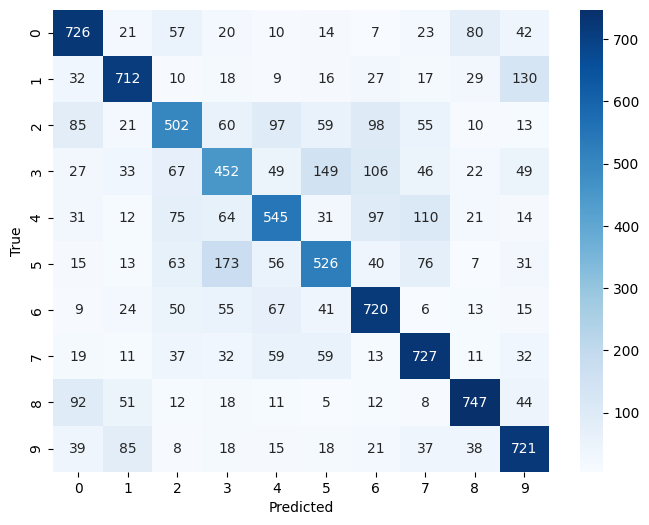

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## TUGASS

### PIL A. Prediksi dengan CNN dari D3

In [7]:
from google.colab import files
uploaded = files.upload()


Saving Angka 1.jpg to Angka 1.jpg
Saving Angka 3.jpg to Angka 3.jpg
Saving Angka 6.jpg to Angka 6.jpg


In [8]:
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """

    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert supaya digit jadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bounding box digit
    thr = np.mean(arr) * 0.8  # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0

    # Tambah channel dim -> (28,28,1)
    arr = arr[..., None]

    return canvas, arr


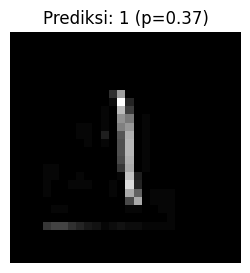

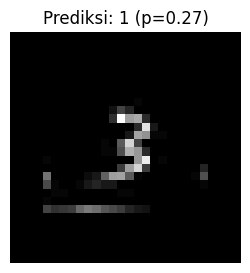

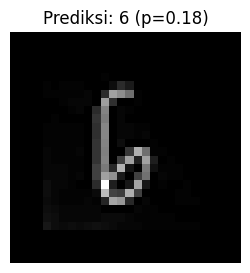

Rekap Prediksi (CNN):
- Angka 1.jpg -> 1 (p=0.371)
- Angka 3.jpg -> 1 (p=0.268)
- Angka 6.jpg -> 6 (p=0.185)


In [9]:
import matplotlib.pyplot as plt

results = []

for fname in uploaded.keys():
    img_pil = Image.open(fname)

    # Preprocess -> (28,28,1)
    disp, x = preprocess_to_mnist_28x28(img_pil)  # disp buat ditampilkan
    x_batch = np.expand_dims(x, axis=0)

    # Prediksi pakai CNN model
    probs = model.predict(x_batch, verbose=0)[0]
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil per gambar
    plt.figure(figsize=(3, 3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")


### PIL B. Prediksi dengan SVM dari D2

In [13]:
from sklearn.metrics import accuracy_score

results = []

for fname in uploaded.keys():
    img_pil = Image.open(fname)

    # Preprocess -> (28,28,1)
    _, x = preprocess_to_mnist_28x28(img_pil)
    x_flat = x.reshape(1, -1)  # (1,784)

    # Prediksi label
    pred = int(clf.predict(x_flat)[0])

    # Confidence (jika ada predict_proba)
    conf = None
    try:
        if hasattr(clf, "predict_proba"):
            conf = float(np.max(clf.predict_proba(x_flat)))
    except Exception:
        pass

    # Simpan hasil
    results.append((fname, pred, conf))

    # Tampilkan
    print(
        f"{fname} -> Prediksi SVM: {pred}"
        + (f" (p≈{conf:.2f})" if conf is not None else "")
    )


Angka 1.jpg -> Prediksi SVM: 1
Angka 3.jpg -> Prediksi SVM: 1
Angka 6.jpg -> Prediksi SVM: 5
